In [1]:
%load_ext autoreload
%autoreload 2
from artificial_model_analysis import analyze_results
from artificial_model_analysis import evaluate_model
from artificial_model_analysis import *
import pandas as pd
from src import utils
import matplotlib.pyplot as plt

result_desc_df = pd.read_csv(utils.path_from_proot('src/analysis/results/result_desc.csv'))
result_desc_df

,file_name,timestamp,description
0,test.csv,2024-11-15 21:17:34,This is just a test to test the model
1,test1.csv,2024-11-15 21:18:07,This is just a test to test the model
2,test2.csv,2024-11-16 13:23:22,This is just a test to test the model
3,test3.csv,2024-11-16 13:36:18,This is just a test to test the model
4,art1.csv,2024-11-16 14:15:32,"w600pc, bs16, base model, lr1e-4"
5,art2.csv,2024-11-16 14:29:17,"wxpx, bs16, base model, lr1e-4"
6,art3.csv,2024-11-16 14:40:02,"wxpx, bs8, base model, lr1e-4"
7,art4.csv,2024-11-16 14:43:59,"wxpx, bs4, base model, lr1e-4"
8,art5.csv,2024-11-16 14:55:11,"wxpx, bs2, base model, lr1e-4"
9,art6.csv,2024-11-16 15:38:33,"wxpx, bs1, base model, lr1e-4"


In [4]:
results_oi = ['art2', 'art3', 'art4', 'art5', 'art6']
bss = ['16', '8', '4', '2', '1']
fig, axs = plt.subplots(3,len(results_oi), figsize=(16,15), sharey="row")
fig.suptitle('Artificial Model Analysis by Batch Size', fontsize=18, y=0.95)
for idx, result in enumerate(results_oi):
    result_df = pd.read_csv(utils.path_from_proot(f'src/analysis/results/{result}.csv'))
    print(f"MSE for BS {bss[idx]}: {result_df['mse'].mean()}")
    width_against_mse(result_df, axs[0,idx])
    true_freq_against_mse(result_df, axs[1,idx])
    true_freq_against_pred_freq(result_df, axs[2,idx])
    # axs[0, idx].set_ylim(0, 5)
    # axs[1, idx].set_ylim(0, 5)

    if idx != 0:
        axs[0,idx].set_ylabel('')
        axs[1,idx].set_ylabel('')
        axs[2,idx].set_ylabel('')
    axs[0,idx].set_title(f'Batch Size {bss[idx]}')
    


MSE for BS 16: 0.652219640283041
MSE for BS 8: 0.49100747601307515
MSE for BS 4: 0.2558934259365167
MSE for BS 2: 0.1868305986594811
MSE for BS 1: 0.03364159264592405
Error in callback <function flush_figures at 0x7750089e5480> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



MSE for Transformer: 0.112
MSE for CNN: 0.00884


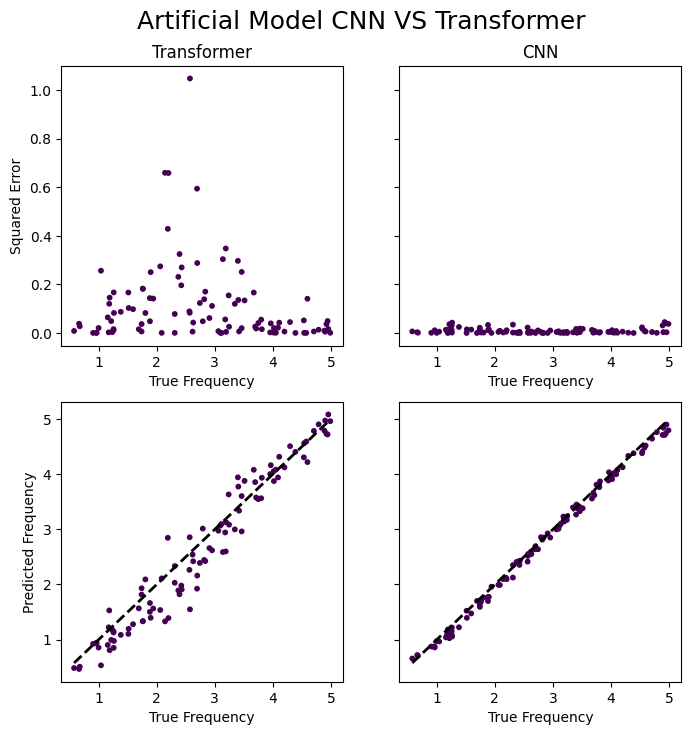

In [68]:
results_oi = ['art7', 'art-cnn2']
names = ['Transformer', 'CNN']
fig, axs = plt.subplots(2,len(results_oi), figsize=(8,8), sharey="row")
fig.suptitle('Artificial Model CNN VS Transformer', fontsize=18, y=0.95)
for idx, result in enumerate(results_oi):
    result_df = pd.read_csv(utils.path_from_proot(f'src/analysis/results/{result}.csv'))
    print(f"MSE for {names[idx]}: {result_df['mse'].mean():.3}")
    true_freq_against_mse(result_df, axs[0,idx])
    true_freq_against_pred_freq(result_df, axs[1,idx])
    if idx != 0:
        axs[0,idx].set_ylabel('')
        axs[1,idx].set_ylabel('')
    axs[0,idx].set_title(f'{names[idx]}')

MSE for BS 8: 0.13865917735095795
MSE for BS 4: 0.18979808602474788
MSE for BS 2: 0.28786357919421834
MSE for BS 1: 0.1313076247732929


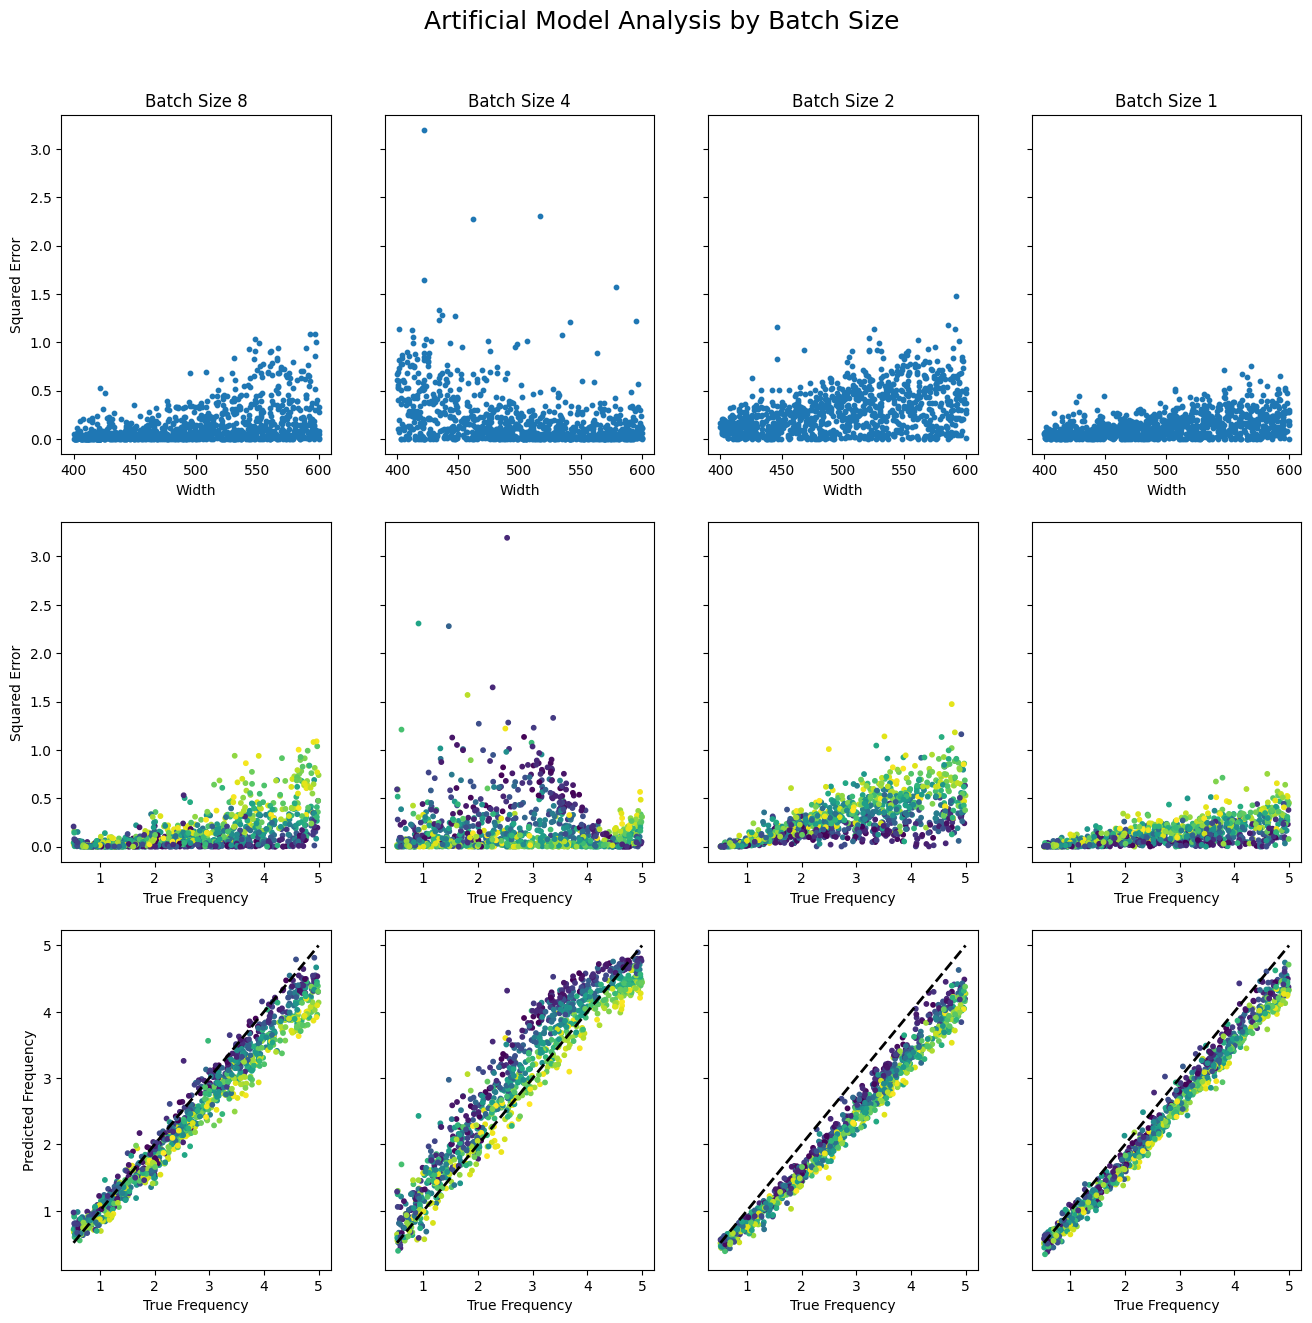

In [3]:
# Analysis of different batch sizes, now with masked final pooling
results_oi = ['art8', 'art9', 'art10', 'art11']
bss = ['8', '4', '2', '1']
fig, axs = plt.subplots(3,len(results_oi), figsize=(16,15), sharey="row")
fig.suptitle('Artificial Model Analysis by Batch Size', fontsize=18, y=0.95)
for idx, result in enumerate(results_oi):
    result_df = pd.read_csv(utils.path_from_proot(f'src/analysis/results/{result}.csv'))
    print(f"MSE for BS {bss[idx]}: {result_df['mse'].mean()}")
    width_against_mse(result_df, axs[0,idx])
    true_freq_against_mse(result_df, axs[1,idx])
    true_freq_against_pred_freq(result_df, axs[2,idx])
    # axs[0, idx].set_ylim(0, 5)
    # axs[1, idx].set_ylim(0, 5)

    if idx != 0:
        axs[0,idx].set_ylabel('')
        axs[1,idx].set_ylabel('')
        axs[2,idx].set_ylabel('')
    axs[0,idx].set_title(f'Batch Size {bss[idx]}')